# Amazon Reviews for SA fine-grained 5 clases CSV


In [88]:
import seaborn as sb
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

pd.options.mode.chained_assignment = None
#from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to C:\Users\Margarida
[nltk_data]     Viera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Margarida
[nltk_data]     Viera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Dataset


In [89]:
train_df = pd.read_csv('../docs/train.csv')
test_df = pd.read_csv('../docs/train.csv')


In [90]:
# Shorten the number of samples from every class_index type (n = 200000)

classes = []
n_samples = 100

for i in range(1, 6):
    classes.append(train_df.query(f'class_index == {i}').sample(n=n_samples))

train_df_s = pd.concat(classes)
train_df_s.reset_index(drop=True, inplace=True)


## Exploratory analysis


In [91]:
# checking for presence of null values that might interfere with data processing
train_df_s.isna().sum()


class_index     0
review_title    0
review_text     0
dtype: int64

Text(0.5, 1.0, 'Rating Distribution')

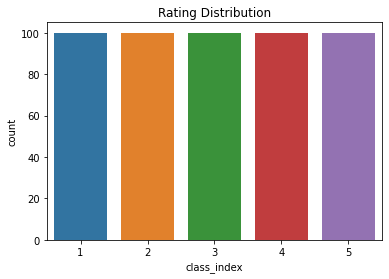

In [92]:
sb.countplot(x='class_index', data=train_df_s)
plt.title('Rating Distribution')


## Preprocess data


In [93]:
train_df_s['review_full'] = train_df_s['review_title']

stop_words = set(nltk.corpus.stopwords.words('english'))

stemmer = PorterStemmer()

# traversing all dataframe's rows
for i in range(train_df_s.shape[0]):

    # process review's title
    title = re.sub('[^a-zA-Z]', ' ', train_df_s['review_title'][i])
    title_tokens = word_tokenize(title)
    title_stems = [stemmer.stem(w) for w in title_tokens if w not in stop_words] 
    train_df_s['review_title'][i] = ' '.join(title_stems)

    # process review's text
    text = re.sub("[^a-zA-Z]", " ", train_df_s['review_text'][i])
    text_tokens = word_tokenize(text)
    text_stems = [stemmer.stem(w) for w in text_tokens if w not in stop_words]
    train_df_s['review_text'][i] = ' '.join(text_stems)

    train_df_s['review_full'][i] = f"{train_df_s['review_title'][i]} {train_df_s['review_text'][i]}"


In [94]:
train_df_s


,class_index,review_title,review_text,review_full
0,1,poor perform krup,our krup coffe maker never made decent cup cof...,poor perform krup our krup coffe maker never m...
1,1,first total recal,desecr memori philip k dick word advic estat i...,first total recal desecr memori philip k dick ...
2,1,doe play,region encod will play devic sold us canada re...,doe play region encod will play devic sold us ...
3,1,veri disappoint,the hitachi magic wand massag advertis speed t...,veri disappoint the hitachi magic wand massag ...
4,1,disappoint,i thought turn standard book spice bedroom wou...,disappoint i thought turn standard book spice ...
...,...,...,...,...
495,5,willa cather earli work,i ador classic it rare i current read book tol...,willa cather earli work i ador classic it rare...
496,5,excel book,an extraordinari classic children adult enjoy ...,excel book an extraordinari classic children a...
497,5,best occupi,my lil month old love tubbi she could without ...,best occupi my lil month old love tubbi she co...
498,5,beauti tiara,problem order came realli fast even betterthan...,beauti tiara problem order came realli fast ev...


## Machine Learning

### Train test split

In [113]:
corpus = train_df_s['review_full'].values

X = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer())
]).fit_transform(corpus)
y = train_df_s['class_index'].values

# 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


### Naive Bayes


Test score:  0.31333333333333335
Real values
 [1 2 1 4 2 5 5 4 4 5 2 2 5 4 1 1 1 1 1 1 5 4 3 3 3 1 3 1 5 4 3 3 4 3 1 5 5
 1 5 1 5 5 4 1 2 3 5 4 4 2 5 2 5 2 1 2 2 2 1 3 5 5 3 3 1 3 5 1 2 2 4 2 2 4
 5 1 5 1 2 3 1 1 4 5 3 3 3 1 2 3 3 5 2 5 5 2 2 3 5 3 2 4 5 3 4 1 1 4 1 2 1
 4 1 5 5 4 1 5 4 3 4 2 5 1 5 3 4 5 1 3 4 4 4 1 4 1 5 1 5 2 2 2 3 3 1 3 5 3
 4 5]
Predictions
 [1 3 2 2 4 4 4 1 2 5 2 3 1 3 2 1 2 1 2 2 4 5 3 2 4 2 2 4 2 4 2 3 4 2 3 3 5
 2 3 1 4 2 4 2 3 4 3 4 4 2 2 1 2 4 2 2 2 1 3 4 4 5 4 2 4 4 2 2 2 2 4 2 2 5
 5 4 2 2 4 1 2 1 5 5 3 3 3 2 3 2 3 2 2 2 5 2 2 2 5 3 4 2 3 2 2 2 2 2 1 1 2
 4 1 2 4 4 2 2 2 2 5 2 4 4 4 2 1 4 4 2 4 2 3 2 3 1 1 2 3 2 2 2 4 2 2 2 2 2
 4 4]


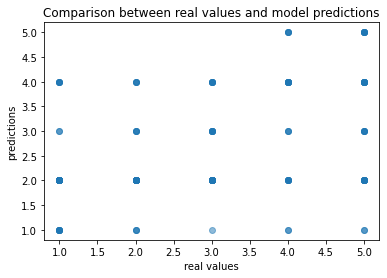

In [114]:
gnb_model = MultinomialNB()
gnb_model.fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)

test_score = gnb_model.score(X_test, y_test)
print('Test score: ', test_score)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Comparison between real values and model predictions')
plt.xlabel('real values')
plt.ylabel('predictions')

print('Real values\n', y_test)
print('Predictions\n', y_pred)


### Decision Tree


### Neural Networks
